# STAT 207 Project 03 - Analytical Tasks on Video Game Genres: Fitting Linear Regression Model and Logistic Regression Model

JJ Park, James Lee, Woo In Shin

### Contribution Report

If you open this document, you should edit and complete the contribution report.  Please complete this report if you work individually, in a group and your submission is the one to be graded, or in a group but someone else should be graded.

In this contribution report below you should list of the following:
1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions to report of each team member.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

wishin2 should be graded. JJ Park (jjp11) & James Lee (hosangl2) & Woo In (Emily) Shin (wishin2) worked together on all parts of this project.

## 1. Introduction

The video game industry is a dynamic and rapidly evolving sector, where understanding the factors that drive a game’s success is crucial for developers and publishers. One of the key elements influencing game performance is its genre, shaping both the gameplay experience and its appeal to different player demographics. In this project, we extend our analysis of the relationship between video game genres and sales performance by using statistical inference methods to make conclusions about the broader gaming market.

The video_games.csv dataset contains information about over a thousand video games released between 2004 and 2010, including variables related to game sales, playtime, and genres. This dataset was crowd-sourced from “How Long to Beat” and curated by Dr. Joe Cox, offering a comprehensive view of how games perform across different platforms and genres. By analyzing the video_games.csv dataset, we will estimate a population parameter through confidence intervals and conduct hypothesis testing to explore potential relationships between game genres and key performance metrics such as sales and playtime. This research will help provide insights into how different genres perform in terms of sales and engagement, aiding developers and publishers in making informed decisions for future game development and marketing strategies.

The dataset represents a sample of video games released between 2004 and 2010, as it was collected from crowd-sourced data on the “How Long to Beat” platform. This means it does not include every video game released during that time period, only those for which users contributed playtime and sales data. The corresponding population of interest would be all video games released between 2004 and 2010 across various platforms, including those not represented in this dataset. For this project, since the dataset already represents a sample, we will perform analysis on this sample without further random sampling, treating it as representative of the larger population of video games during that period.

Research Questions
1.	Linear Regression Question: What is the relationship between a game’s sales (quantitative response) and explanatory variables like review score, release year, and used price?
2.	Logistic Regression Question: How do Review Score, Year Released, and Used Price relate to the log-odds of a video game achieving above-average sales? How does a classifier built on this logistic regression model perform on new data?

Response Variables
1.	Linear Regression: Global sales (in millions of units).
2. Logistic Regression: Above Average Sales, 1 if US sales is above the average, 0 if US sales is at or below the average

Motivation

Understanding the factors influencing game sales and blockbuster status can guide developers and publishers in making data-driven decisions to optimize game development, marketing strategies, and resource allocation.

In [1]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
df = pd.read_csv("video_games.csv", encoding='unicode_escape')

In [3]:
df.head()

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1


## 2. Linear Regression Analytical Tasks

Research Questions
- Linear Regression Question: What is the relationship between a game’s sales (quantitative response) and explanatory variables like review score, release year, and used price?

Response Variables
- Linear Regression: Global sales (in millions of units).

In [4]:
print(df.columns)

Index(['Console', 'Title', 'US Sales (millions)', 'Block4', 'Block2', 'Block1',
       'Block0.5', 'YearReleased', '2004', '2005',
       ...
       'Tricks', 'Volleyball', 'Wakeboarding', 'Wrestling', 'FirstPerson',
       'Platform', 'Isometric', 'SideScrolling', 'TopDown', 'ThirdPerson'],
      dtype='object', length=166)


In [5]:
df_cleaned = df[['US Sales (millions)', 'Review Score', 'YearReleased', 'Usedprice']]
df_cleaned = df_cleaned.dropna()
print(df_cleaned.head())

   US Sales (millions)  Review Score  YearReleased  Usedprice
0                 4.69            85          2004      24.95
1                 0.56            89          2004      14.95
2                 0.54            81          2004      22.95
3                 0.49            81          2004      12.95
4                 0.45            61          2004      14.95


In [6]:
X = df_cleaned.drop(columns=['US Sales (millions)'])
y = df_cleaned['US Sales (millions)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     US Sales (millions)   R-squared:                       0.136
Model:                             OLS   Adj. R-squared:                  0.134
Method:                  Least Squares   F-statistic:                     74.23
Date:                 Wed, 11 Dec 2024   Prob (F-statistic):           1.39e-44
Time:                         08:28:04   Log-Likelihood:                -1979.1
No. Observations:                 1416   AIC:                             3966.
Df Residuals:                     1412   BIC:                             3987.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          144.4900     43.496      3.322      0.001      59.167     229.813
Review Score     0.0211      0.002     10.877      0.000       0.017       0.025
YearReleased    -0.0727      0.022     -3.354      0.001      -0.115      -0.030
Usedprice        0.0270      0.004      6.949      0.000       0.019       0.035
==============================================================================
Omnibus:                     1767.595   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233656.988
Skew:                           6.598   Prob(JB):                         0.00
Kurtosis:                      64.532   Cond. No.                     3.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X_test_sm = sm.add_constant(X_test)
y_pred = model_sm.predict(X_test_sm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1.0754998804806593


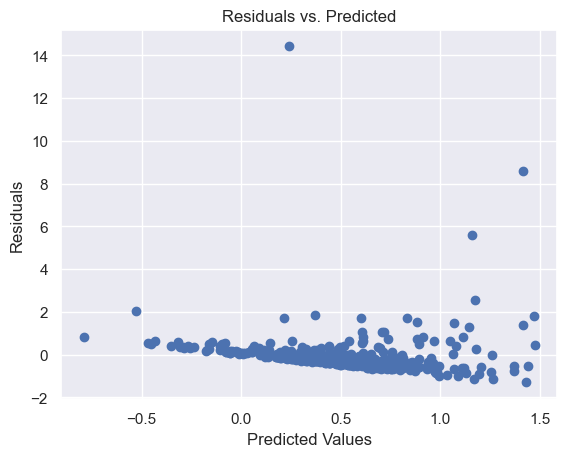

In [9]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


US Sales (millions) = 144.49 + 0.0211 * Review Score - 0.0727 * YearReleased + 0.0270 * UsedPrice

**Interpretation of Regression Coefficients**

The linear regression model provides insights into the relationship between US Sales (millions) and the predictors: Review Score, YearReleased, and UsedPrice. The intercept (144.49) represents the hypothetical sales if all predictors were zero, although this is not meaningful in practice. For Review Score, a 1-unit increase is associated with an increase of approximately 0.0211 million units in sales, holding all other variables constant. For YearReleased, each additional year is associated with a 0.0727 million unit decrease in sales, suggesting that older games tend to have higher sales. Finally, for UsedPrice, a 1-unit increase is associated with an increase of approximately 0.0270 million units in sales, indicating that games with higher used prices tend to have better sales performance.

**Confidence Intervals**

The 95% confidence intervals for the predictors confirm the statistical significance of the relationships. For Review Score, the interval ranges from 0.017 to 0.025, for YearReleased, it ranges from -0.115 to -0.030, and for UsedPrice, it ranges from 0.019 to 0.035. None of these intervals include zero, indicating strong evidence that these predictors are significantly associated with US Sales (millions).

**Model Performance**

The model explains approximately 13.6% of the variability in US Sales (millions) based on the R² value, with an adjusted R² of 13.4%, accounting for the number of predictors. This indicates that while the predictors are statistically significant, the model leaves a significant portion of variability unexplained. The RMSE, calculated as 1.0755 million units, represents the average deviation of predicted sales from actual sales. While the model provides meaningful insights, it suggests that additional predictors could improve the explained variability.

**Residual Analysis**

The residuals vs. predicted values plot indicates that there is no clear pattern in the residuals, suggesting that the linearity assumption is reasonable. However, a few extreme outliers, with residuals exceeding 10 or falling below -2, may slightly impact the model’s predictive performance.

**Conclusion**

The analysis shows that Review Score, YearReleased, and UsedPrice are statistically significant predictors of US Sales (millions). Higher review scores and used prices are positively associated with increased sales, while later release years are associated with lower sales. Despite these findings, the model explains only a modest portion of the variability in sales. Future analyses could include additional predictors, such as game genre, marketing budget, or platform, to improve the model’s explanatory power and predictive accuracy.

## 3. Logistic Regression Analytical Tasks

Research Questions
- "How do Review Score, Year Released, and Used Price relate to the log-odds of a video game achieving above-average sales? Additionally, how does a classifier built on this logistic regression model perform on new data?"

Response Variables
- Logistic regression: Above Average Sales, 1 if US sales is above the average, 0 if US sales is at or below the average

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve

In [11]:
y_train_logistic = (y_train > y_train.mean()).astype(int)  # 1 if above average sales, 0 otherwise
X_train_sm_logistic = sm.add_constant(X_train)
logit_model = sm.Logit(y_train_logistic, X_train_sm_logistic).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.438937
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     US Sales (millions)   No. Observations:                 1416
Model:                           Logit   Df Residuals:                     1412
Method:                            MLE   Df Model:                            3
Date:                 Wed, 11 Dec 2024   Pseudo R-squ.:                  0.1786
Time:                         08:28:05   Log-Likelihood:                -621.53
converged:                        True   LL-Null:                       -756.69
Covariance Type:             nonrobust   LLR p-value:                 2.651e-58
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          190.5652    118.550      1.607      0.108     -41.788     422.918
Review Score     0.0946      0.007     12.724      0.000       0.080       0.109
YearReleased    -0.0992      0.059     -1.678      0.093      -0.215       0.017
Usedprice        0.0212      0.010      2.073      0.038       0.001       0.041
================================================================================
"""

Review Score: Higher values of Review Score are associated with a higher probability of achieving above-average sales.
A 1-unit increase in Review Score increases the log-odds of success by 0.0946 (statistically significant).

YearReleased: Lower values of YearReleased (i.e., older release years) are associated with a higher probability of achieving above-average sales.
However, this relationship is not statistically significant (p-value = 0.093).

UsedPrice: Higher values of UsedPrice are associated with a higher probability of achieving above-average sales.
A 1-unit increase in UsedPrice increases the log-odds of success by 0.0212 (statistically significant).

In [12]:
y_pred_prob = logit_model.predict(X_train_sm_logistic)
pseudo_r2 = 1 - (logit_model.llf / logit_model.llnull)
print(f"Pseudo-R²: {pseudo_r2:.4f}")
auc = roc_auc_score(y_train_logistic, y_pred_prob)
print(f"AUC: {auc:.4f}")

Pseudo-R²: 0.1786
AUC: 0.7842


Pseudo-R²: 0.1786
This indicates that the model explains approximately 17.86% of the variability in the log-odds of achieving above-average sales. While this is not a very high value, it suggests that the predictors collectively improve the model compared to a null model with no predictors.

AUC (Area Under the Curve): 0.7842
The AUC value of 0.7842 reflects the model's ability to distinguish between games that achieve above-average sales and those that do not. An AUC value closer to 1.0 represents excellent classification performance, while 0.5 indicates random guessing. With an AUC of 0.7842, the model demonstrates a good ability to classify games as successful or not.

The logistic regression model effectively predicts above-average sales with good classification performance (AUC) but moderate explanatory power (Pseudo-R²). This suggests that while the model is reliable for classification, there may still be room for improvement in capturing more variability in the log-odds of success. Adding additional predictors or refining existing ones could further enhance the model’s performance.

In [13]:
X_test_sm_logistic = sm.add_constant(X_test)
y_pred_prob_test = logit_model.predict(X_test_sm_logistic)
y_pred_test = (y_pred_prob_test >= 0.5).astype(int)

y_test_logistic = (y_test > y_train.mean()).astype(int)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

cm = confusion_matrix(y_test_logistic, y_pred_test)

accuracy = accuracy_score(y_test_logistic, y_pred_test)
sensitivity = recall_score(y_test_logistic, y_pred_test)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(cm)

Accuracy: 0.8305
Sensitivity (Recall): 0.3506
Specificity: 0.9639
[[267  10]
 [ 50  27]]


The type of error to minimize is false negatives (Type II errors). These occur when a game that actually achieves above-average sales is incorrectly predicted to fail. In the context of video game sales, false negatives could lead to missed opportunities, such as underinvesting in games with high potential or failing to allocate sufficient marketing resources. Minimizing false negatives is critical to ensuring that successful games are identified and prioritized, maximizing their commercial success and profitability.

While the classifier performs well in terms of overall accuracy (83.05%) and specificity (96.39%), its low sensitivity (35.06%) is a concern. The low sensitivity means the model frequently fails to identify games that achieve above-average sales, which conflicts with the goal of minimizing false negatives. As a result, the current classifier is not fully satisfactory for this objective. Adjusting the probability threshold to improve sensitivity or exploring additional predictors could help create a more balanced and effective model for identifying successful games.

Conclusion:
The logistic regression model identifies Review Score and UsedPrice as significant predictors of above-average sales, with higher values of both increasing the likelihood of success. The model shows good classification performance with an AUC of 0.7842, but its low sensitivity (35.06%) highlights a significant weakness in identifying successful games. While the model effectively avoids false positives, its tendency to miss true successes makes it less suitable for minimizing false negatives. To improve its utility, further refinement is needed to increase sensitivity and better align with the goal of accurately identifying successful games.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

In summary, we fitted two regression models. First, we conducted a linear regression task to analyze the relationship between game's sales and the review score, release year, and used price. The model we fitted: US Sales (millions) = 144.49 + 0.0211 * Review Score - 0.0727 * YearReleased + 0.0270 * UsedPrice. According to the analysis, the review score and used prices were positively related to the sales. However, the later the game was released, the lower the sales were. Through the residual analysis, we determined that this model met the linearity assumption, but the strength of the model was weak because the R² and adjusted R² values were only about 0.13. 


Secondly, through the logistic regression analytical task, the relationship between the Review Score, Year Released, Used Price and the log-odds of a video game achieving above-average sales was identified, and additionally classifier was built and evaluated. The model we fitted: log-odds of being above average sales = 190.5652 + 0.0946 * Review Score - 0.0992 * YearReleased + 0.0212 * UsedPrice. As a result of the analysis, it can be seen that the review score and used price are important variables, and an increase in one unit of those variables affects the increase in sales. Although the Pseudo-R² was about 0.17 which is not high, the AUC was about 0.78 indicating that the strength of the model was strong. In the context of this study, it is important to minimize false negatives because it is important to recognize games that can have high sales and potential. However, according to the classifier, the sensitivity was low at about 35%.

There are several limitations to this study. The generalizability of the results may have been limited because the size of the data used to fit the model was reduced in the process of dividing it into training data and test data. Also, there is a fact that the interpretation of the slopes or results may not be reliable because the examination process for multicollinearity of predictor variables is missing. Also, the model strength must be increased by adding variables.

Future research can use Backwards Elimination Algorithm or Forward Selection Algorithm to fit the best model to predict game's sales. This allows game developers or industry players to optimize game development and marketing strategies, as they can better understand the factors that influence game sales and blockbuster status.